# **1. Load dependencies and data**

## Load dependencies

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib
import talib as ta
#Libraries for time-series analysis
from statsmodels.tsa.arima_model import ARIMA

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import spearmanr
import xgboost as xgb
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

--2023-08-09 02:34:34--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-08-09 02:34:34--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-08-09 02:34:34--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving phoenixna

## Load Data And Preprocessing

In [ ]:
%cd /content/
Apple_data = pd.read_csv('AAPL.csv')
Amd_data = pd.read_csv('AMD.csv')
Amazon_data = pd.read_csv('AMZN.csv')
Dia_data = pd.read_csv('DIA.csv')
Gbpusd_data = pd.read_csv('GBPUSD=X.csv')
Google_data = pd.read_csv('GOOG.csv')
Ibm_data = pd.read_csv('IBM.csv')
Jpy_data = pd.read_csv('JPY=X.csv')
Microsoft_data = pd.read_csv('MSFT.csv')
Nvidia_data = pd.read_csv('NVDA.csv')
Qqq_data = pd.read_csv('QQQ.csv')
Spy_data = pd.read_csv('SPY.csv')
Vix_data = pd.read_csv('VIX.csv')


/content


In [ ]:
# this is the function to clean the data
def clean_data(df):
    cleaned_df = pd.DataFrame()
    cleaned_df["Date"] = pd.to_datetime(df.iloc[:, 0])
    cleaned_df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]] = df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]].astype(str).astype(float)
    return cleaned_df
df_list = [Apple_data, Amd_data, Amazon_data, Dia_data, Gbpusd_data, Google_data,
        Ibm_data, Jpy_data, Microsoft_data, Nvidia_data, Qqq_data, Spy_data, Vix_data]
# Clean the data
for stock in df_list:
    df = pd.DataFrame()
    df = clean_data(stock)
    stock = df


In [ ]:
stk_tickers = ['GOOG', 'AAPL', 'AMD', 'AMZN', 'MSFT', 'NVDA', 'IBM', ]
etf_tickers = ['SPY', 'QQQ']
ccy_tickers = ['GBPUSD=X', 'JPY=X']
idx_tickers = ['DIA', 'VIX']


stk_list = [Google_data,Apple_data, Amd_data, Amazon_data, Nvidia_data, Ibm_data]
etf_list = [Spy_data, Qqq_data]
ccy_list = [Gbpusd_data, Jpy_data]
idx_list = [Dia_data, Vix_data]
stk_data = pd.concat(stk_list,axis=1,keys=stk_tickers).swaplevel(0,1,axis=1).sort_index(axis=1)
etf_data = pd.concat(etf_list,axis=1,keys=etf_tickers).swaplevel(0,1,axis=1).sort_index(axis=1)
ccy_data = pd.concat(ccy_list,axis=1,keys=ccy_tickers).swaplevel(0,1,axis=1).sort_index(axis=1)
idx_data = pd.concat(idx_list,axis=1,keys=idx_tickers).swaplevel(0,1,axis=1).sort_index(axis=1)

print(stk_data)

       Adj Close                                                              \
            AAPL         AMD        AMZN        GOOG        MSFT        NVDA   
0       0.960588   21.410000    2.226000    5.048826    1.802891   54.325985   
1       0.970452   20.209999    2.107000    4.844342    1.718021   53.742443   
2       0.978952   19.750000    2.088500    4.819685    1.734078   53.631298   
3       0.979711   19.719999    2.052500    4.696148    1.717257   53.464561   
4       1.051045   19.920000    2.116000    4.828153    1.684379   53.231136   
...          ...         ...         ...         ...         ...         ...   
4672  193.220001  111.099998  128.250000  129.869995  459.000000  142.970001   
4673  195.830002  112.959999  132.210007  133.009995  467.500000  143.449997   
4674  196.449997  114.400002  133.679993  133.110001  467.290009  144.179993   
4675  195.610001  117.599998  131.690002  131.889999  465.070007  143.330002   
4676  192.580002  109.349998  128.210007

we need a series to predict. We choose to predict using weekly returns. We approximate this by using 5 business day period returns.
Next, we need to calculatet the return prrice for all other data

# 2.Prediction

In [ ]:
def ewm_smoother(x_train, span=None):
    x_train = pd.DataFrame(x_train)
    #print(x_train.columns.values)
    X_tosmooth = x_train.drop(x_train.iloc[:,-6:],axis=1)
    x_train_smooth = X_tosmooth.ewm(span=span, adjust=True).mean()
    x_train_smooth = x_train_smooth.join(x_train.iloc[:,-6:])
    return x_train_smooth.values

def sharpe(y_true, y_pred):
    positions = np.where(y_pred> 0,1,-1 )
    dailyRet = pd.Series(positions).shift(1).fillna(0).values * y_true
    dailyRet = np.nan_to_num(dailyRet)
    ratio = (253/5 ** (1.0/2.0)) * np.mean(dailyRet) / np.std(dailyRet)
    return ratio
def information_coefficient(y_true, y_pred):
    rho, pval = spearmanr(y_true,y_pred) #spearman's rank correlation
    print (rho)
    return rho
myscorer = make_scorer(sharpe, greater_is_better=True)

smoother = FunctionTransformer(ewm_smoother, validate=False)

## Calculate Tech indicators

In [ ]:
def get_indicator(df,indicator):
    ret_df = df
    timeperiod = 5
    if 'MACD' in indicator: #Moving Average Convergence Divergence
        macd, macdsignal, macdhist = ta.MACD(df.Close.values, fastperiod=12, slowperiod=26, signalperiod=9)
        ret_df = ret_df.join(pd.DataFrame([macd, macdsignal, macdhist]).T.rename(columns={0: "Macddif", 1: "Macddem", 2: "Macdhist"}))
    if 'MFI' in indicator:
        mfi = ta.MFI(np.reshape(df.High.values.astype('float64'),-1), \
            np.reshape(df.Low.values.astype('float64'),-1), np.reshape(df.Close.values.astype('float64'),-1),\
                 np.reshape(df.Volume.values.astype('float64'),-1), timeperiod=timeperiod)
        ret_df = ret_df.join(pd.DataFrame([mfi]).T.rename(columns={0: "Mfi"}))
    if 'SMA' in indicator:
        sma = ta.SMA(df.Close.values)
        ret_df = ret_df.join(pd.DataFrame([sma]).T.rename(columns={0: "Sma"}))
    if 'MOM' in indicator:
        mom = ta.MOM(df.Close.values, timeperiod=timeperiod)
        ret_df = ret_df.join(pd.DataFrame([mom]).T.rename(columns={0: "Mom"}))
    if 'ROC' in indicator:
        roc = ta.ROC(df.Close.values, timeperiod=timeperiod)
        ret_df = ret_df.join(pd.DataFrame([roc]).T.rename(columns={0: "Roc"}))
    if 'RSI' in indicator:
        rsi = ta.RSI(df.Close.values, timeperiod=timeperiod)
        ret_df = ret_df.join(pd.DataFrame([rsi]).T.rename(columns={0: "Rsi"}))
    if 'ATR' in indicator: #Volatility Indicator   -   Average True Range
        rsi = ta.ATR(df.High.values,df.Low.values,df.Close.values, timeperiod=timeperiod)
        ret_df = ret_df.join(pd.DataFrame([atr]).T.rename(columns={0: "Atr"}))
    if 'ADX' in indicator:
        adx = ta.ADX(df.High.values,df.Low.values,df.Close.values, timeperiod=timeperiod)
        ret_df = ret_df.join(pd.DataFrame([adx]).T.rename(columns={0: "Adx"}))
    if 'SAR' in indicator:
        sar = ta.SAR(df.High.values,df.Low.values, acceleration=0.02, maximum=0.2)
        ret_df = ret_df.join(pd.DataFrame([sar]).T.rename(columns={0: "Sar"}))
    return ret_df

In [ ]:
return_period = 5
goog = get_indicator(Google_data, ['SMA','RSI','ROC','MOM','ADX','SAR'])
X_indicator = goog.iloc[:,-6:]
X_indicator = X_indicator.fillna(X_indicator.mean())
Y = np.log(stk_data.loc[:, ('Adj Close', ('GOOG','AMD'))]).diff(return_period).shift(-return_period)
Y.columns = ['GOOG_pre', 'non']
X1 = np.log(stk_data.loc[:, ('Adj Close', ('AAPL', 'AMD', 'AMZN', 'MSFT', 'NVDA', 'IBM'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(etf_data.loc[:, ('Adj Close', ('SPY', 'QQQ'))]).diff(return_period)
X2.columns = X2.columns.droplevel()
X3 = np.log(ccy_data.loc[:, ('Adj Close', ('GBPUSD=X', 'JPY=X'))]).diff(return_period)
X3.columns = X3.columns.droplevel()
X4 = np.log(idx_data.loc[:, ('Adj Close', ('DIA', 'VIX'))]).diff(return_period)
X4.columns = X4.columns.droplevel()
X5 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'GOOG')]).diff(i) for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()
X5.columns = ['GOOG_DT', 'GOOG_3DT', 'GOOG_6DT', 'GOOG_12DT']
X = pd.concat([X1, X2, X3, X4, X5, X_indicator], axis=1)
dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
CopyX = dataset[['GOOG_pre']].copy()
Y = dataset.loc[:, Y.columns]
X = dataset.loc[:, X.columns]
Y = Y[1:]
X = X[1:]
Y.drop(columns=['non'], inplace=True)
print(X)

          AAPL       AMD      AMZN      MSFT      NVDA       SPY       QQQ  \
66    0.067377  0.054100  0.017199 -0.003405 -0.031906  0.004843  0.012081   
71   -0.212964 -0.100884 -0.046740 -0.093819 -0.132879 -0.033171 -0.053249   
76    0.004234 -0.056587  0.000606  0.040841 -0.033003  0.012363  0.010024   
81    0.015652 -0.025669 -0.020796 -0.014037  0.028822  0.001556 -0.003140   
86    0.032199  0.046009  0.064616  0.055003 -0.012120  0.011510  0.024846   
...        ...       ...       ...       ...       ...       ...       ...   
4650  0.001891 -0.110574  0.014556 -0.049456 -0.045689 -0.018418 -0.026883   
4655  0.038074  0.074453  0.022443  0.042899  0.017585  0.028223  0.034648   
4660 -0.023021 -0.039628 -0.011120 -0.000189  0.005744 -0.003001 -0.005742   
4665  0.029598  0.057682  0.030965  0.113337  0.006820  0.026166  0.046619   
4671 -0.003080 -0.055992 -0.054736 -0.035128  0.040432  0.000681 -0.021307   

      GBPUSD=X     JPY=X       DIA  ...   GOOG_DT  GOOG_3DT  GO

<ipython-input-16-8c99276d329b>:7: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  X1 = np.log(stk_data.loc[:, ('Adj Close', ('AAPL', 'AMD', 'AMZN', 'MSFT', 'NVDA', 'IBM'))]).diff(return_period)


## Scale the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)




## Build the pipeline and p-grid

In [ ]:
pipe = Pipeline([("scaler", StandardScaler()), ("PCA", PCA()), ('xgb', xgb.XGBRegressor(verbosity=0))])

n_estimators  = [50, 100]
max_depth = [1, 3, 6,10,20, 50]
learning_rate = [0.1, 0.3,0.5, 0.8]
objective = ['reg:squarederror']
booster = ['gbtree', 'gblinear', 'dart']
gamma = [0, 1,5,10, 20]
base_score = [0.3, 0.5 ,0.7, 0.8]
subsample = [0.2, 0.5, 1]
sampling_method = ['uniform', 'gradient_based']
tree_method = ['auto', 'exact', 'approx', 'hist']
min_child_weight = [0, 1, 5, 10]
max_delta_step = [0, 1, 20, 50]
n_components = [1, 2]

# parameter grid
para_grid = {'xgb__n_estimators': n_estimators,
            'xgb__learning_rate': learning_rate,
            'xgb__objective': objective,
            'xgb__booster': booster,
            'xgb__base_score': base_score,
            'PCA__n_components': n_components
            }


In [ ]:
from sklearn.metrics import r2_score
np.random.seed(2)
#Fit the randomized search object with Xtrain and ytrain.ravel()
rso = RandomizedSearchCV(pipe,
                         para_grid,
                         n_iter= 100,
                         random_state = 30,
                         scoring = make_scorer(r2_score, greater_is_better=True),
                         )

# Fit the model to find the best hyperparameter values
rso.fit(x_train, y_train)
print('Best parameters:', rso.best_params_)
print("rso best score: ", rso.best_score_)

KeyboardInterrupt: ignored

In [ ]:
best_xgb = xgb.XGBRegressor(  objective='reg:squarederror', n_estimators=100,
                            learning_rate=0.1, booster='gblinear',
                            base_score=0.3, missing=1)

## Prdict and result analysis

In [ ]:
# PCA the features
pca = PCA(n_components=2)
pca.fit(x_train)

best_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.3, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=1, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

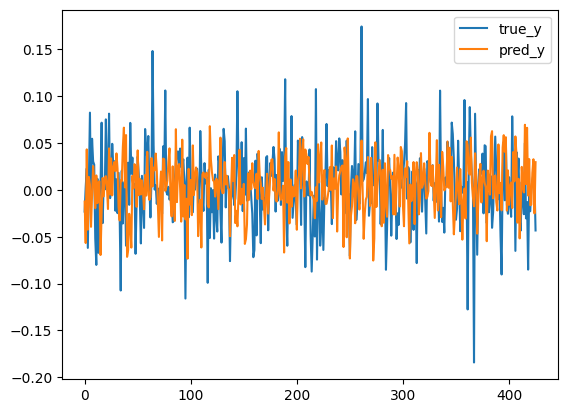

In [ ]:
true_y = y_test.values.ravel()
pred_y = best_xgb.predict(x_test)
pred_y


from matplotlib import pyplot as plt
pyplot.plot(true_y, label='true_y')
pyplot.plot(pred_y, label='pred_y')
pyplot.legend()
pyplot.show()

<ipython-input-115-6b27b816a32e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, fit=norm, ax=axes[0], axlabel='Residuals', label='Residuals')


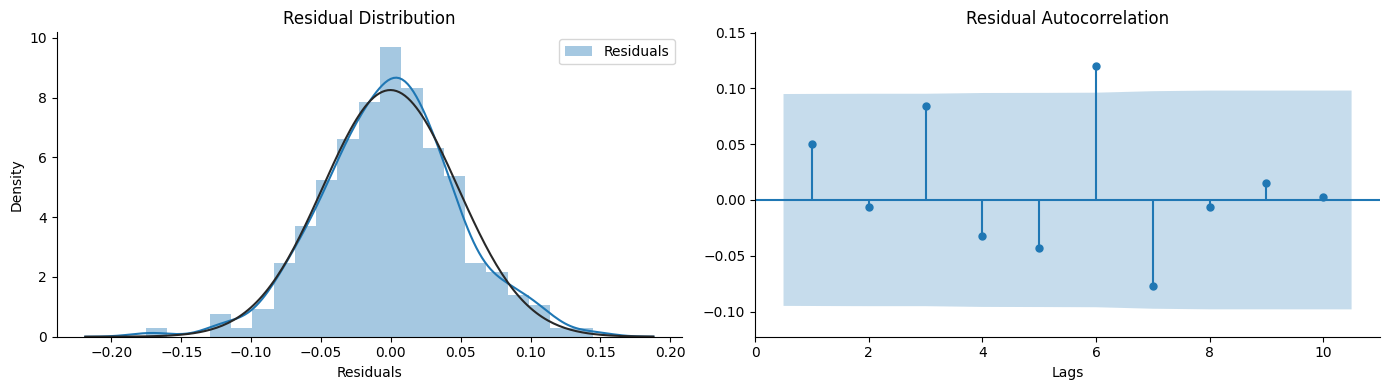

In [ ]:
residuals = np.subtract(true_y, pred_y)
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
sns.distplot(residuals, fit=norm, ax=axes[0], axlabel='Residuals', label='Residuals')
axes[0].set_title('Residual Distribution')
axes[0].legend()
plot_acf(residuals, lags=10, zero=False, ax=axes[1],auto_ylims=True, title='Residual Autocorrelation')
axes[1].set_xlabel('Lags')
sns.despine()
fig.tight_layout();
plt.show()

calculate cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD, rho, pval

In [ ]:
df_ret = Google_data.iloc[CopyX.index.values]['Adj Close'].pct_change(periods=1).fillna(0)
df_ret1 = df_ret.reset_index(drop= True)[:x_train.shape[0],]
df_ret2 = df_ret.reset_index(drop= True)[x_train.shape[0]:-1,]
print(df_ret2)

426    0.031366
427   -0.011310
428    0.011422
429    0.022861
430   -0.014363
         ...   
847    0.009685
848   -0.040061
849    0.012344
850   -0.023640
851    0.054116
Name: Adj Close, Length: 426, dtype: float64


In [ ]:
import fAux
import detrendPrice
positions = np.where(best_xgb.predict(x_train)> 0,1,-1 )
dailyRet = pd.Series(positions).shift(1).fillna(0).values * df_ret1
dailyRet = dailyRet.fillna(0)
cumret = np.array(np.cumprod(dailyRet + 1) - 1)

rho, pval = spearmanr(y_test,best_xgb.predict(x_test)) #spearman's rank correlation: very small but significant

cagr = (1 + cumret[-1]) ** ((253/5) / len(cumret)) - 1
maxDD, maxDDD = fAux.calculateMaxDD(cumret)
ratio = ((253/5) ** (1.0/2.0)) * np.mean(dailyRet) / np.std(dailyRet)
print (('In-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6} Rho={:0.6} PVal={:0.6}\n'\
    ).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD, rho, pval))

In-sample: CAGR=0.00697057 Sharpe ratio=0.190687 maxDD=-0.746201 maxDDD=416 Calmar ratio=0.00934141 Rho=0.0494161 PVal=0.308886



In [ ]:
positions2 = np.where(best_xgb.predict(x_test)> 0,1,-1 )
dailyRet2 = pd.Series(positions2).shift(1).fillna(0).values * df_ret2
dailyRet2 = dailyRet2.fillna(0)
cumret2 = np.array(np.cumprod(dailyRet2 + 1) - 1)

rho, pval = spearmanr(y_test,best_xgb.predict(x_test)) #spearman's rank correlation: very small but significant

cagr = (1 + cumret2[-1]) ** ((253/5) / len(cumret2)) - 1
maxDD, maxDDD = fAux.calculateMaxDD(cumret2)
ratio = ((253/5) ** (1.0/2.0)) * np.mean(dailyRet2) / np.std(dailyRet2)
print (('Out-of-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}  Rho={:0.6} PVal={:0.6}\n'\
).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD, rho, pval))

Out-of-sample: CAGR=-0.0864164 Sharpe ratio=-0.209166 maxDD=-0.605321 maxDDD=365 Calmar ratio=-0.142761  Rho=0.0494161 PVal=0.308886



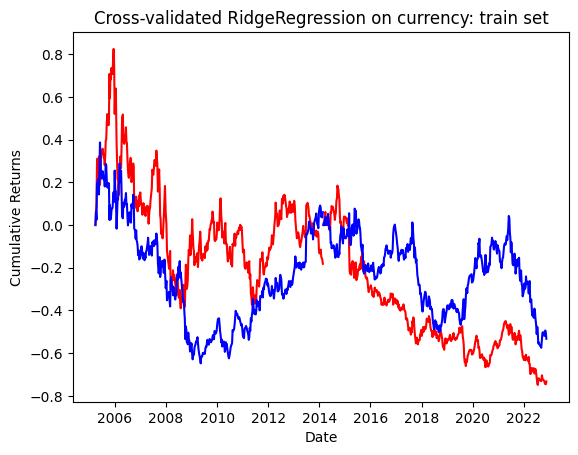

In [ ]:
positionsytrain = np.where(y_train.values.ravel() > 0,1,-1 )
dailyRetytrain = pd.Series(positionsytrain).shift(1).fillna(0).values * df_ret1
dailyRetytrain = dailyRetytrain.fillna(0)
cumretytrain = np.array(np.cumprod(dailyRetytrain + 1) - 1)



positionsytest = np.where(y_test.values.ravel() > 0,1,-1 )
dailyRetytest = pd.Series(positionsytest).shift(1).fillna(0).values * df_ret2
dailyRetytest = dailyRetytest.fillna(0)
cumretytest = np.array(np.cumprod(dailyRetytest + 1) - 1)



dates = df.iloc[CopyX.index.values]['Date']
dates= dates.reset_index(drop= True)[:x_train.shape[0],]
pyplot.figure(1)
pyplot.plot(dates, cumretytrain ,'r')
pyplot.plot(dates, cumret,'b')
pyplot.title('Cross-validated RidgeRegression on currency: train set')
pyplot.ylabel('Cumulative Returns')
pyplot.xlabel('Date')
dates = df.iloc[CopyX.index.values]['Date']
dates= dates.reset_index(drop= True)[x_train.shape[0]:,]
pyplot.plot(dates[:-1], cumretytest ,'r')
pyplot.plot(dates[:-1], cumret2,'b')

average return -0.007358
[-0.02414095  0.02231331]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.729


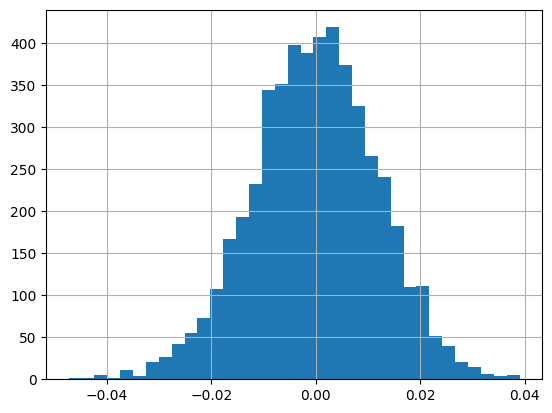

In [ ]:
import WhiteRealityCheckFor1
#white reality check

new_close=Google_data.iloc[CopyX.index.values]['Adj Close'].reset_index(drop= True)[(x_train.shape[0]):,]
detrended_close = detrendPrice.detrendPrice(new_close)
detrended_ret1 = detrended_close.pct_change(periods=1).fillna(0)
detrended_syst_rets = detrended_ret1 * pd.Series(positions2).shift(1).fillna(0)
WhiteRealityCheckFor1.bootstrap(detrended_syst_rets)
pyplot.show()

In [ ]:
# Train error
train_result = mean_squared_error(best_xgb.predict(x_train), y_train)
test_result = mean_squared_error(best_xgb.predict(x_test), y_test)

#train_perc = "{:.0%}".format(train_result)
#test_perc = "{:.0%}".format(test_result)
#print(train_perc, test_perc)
print(train_result, test_result)

0.0020641675814924714 0.0023356173013301985
